In [1]:
import pandas as pd, numpy as np, seaborn as sns

In [2]:
df = pd.read_csv('Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


<AxesSubplot:xlabel='Hours_Studied', ylabel='Test_Grade'>

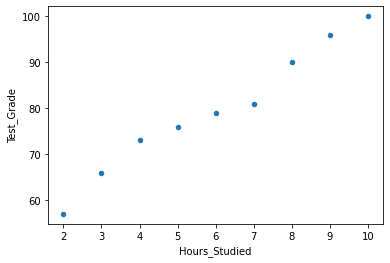

In [3]:
df.plot(kind = 'scatter', x = 'Hours_Studied', y = 'Test_Grade')

<AxesSubplot:xlabel='Hours_Studied', ylabel='Test_Grade'>

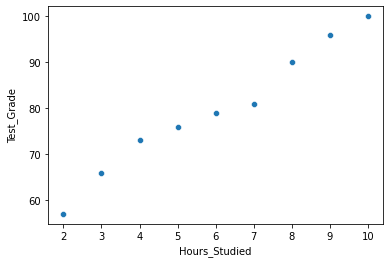

In [4]:
sns.scatterplot(data = df, x = 'Hours_Studied', y = 'Test_Grade')

# Training / Visualizing the model

<AxesSubplot:xlabel='Hours_Studied', ylabel='Test_Grade'>

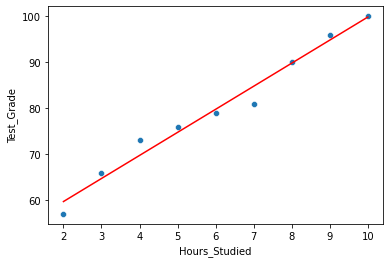

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['Hours_Studied']]
y = df['Test_Grade']
model.fit(X, y)

y_pred = model.predict(X)
df['Test_Grade_Predicted'] = y_pred

sns.scatterplot(data = df, x = 'Hours_Studied', y = 'Test_Grade')
# sns.lineplot(data = df, x = 'Hours_Studied', y = 'Test_Grade_Predicted', color = 'red')
sns.lineplot(x = np.squeeze(X.values), y = y_pred, color = 'red')

In [6]:
model.intercept_ #value of y at x = 0 (intercept) (theta 0)

49.67777777777776

In [7]:
model.coef_# theta 1

array([5.01666667])

In [8]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9757431074095347

In [9]:
df = pd.read_csv('Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [10]:
df.loc[df.index.stop] = np.array([5, 100])
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100
9,5,100


<AxesSubplot:xlabel='Hours_Studied', ylabel='Test_Grade'>

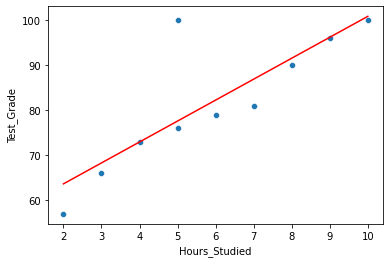

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['Hours_Studied']]
y = df['Test_Grade']
model.fit(X, y)
y_pred = model.predict(X)

sns.scatterplot(data = df, x = 'Hours_Studied', y = 'Test_Grade')
# sns.lineplot(data = df, x = 'Hours_Studied', y = 'Test_Grade_Predicted', color = 'red')
sns.lineplot(x = np.squeeze(X.values), y = y_pred, color = 'red')

# Linear equations of different degrees

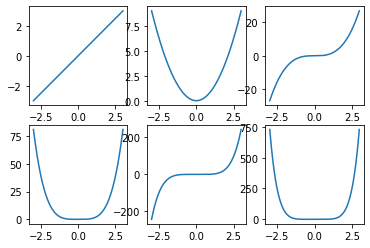

In [12]:
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 1000)

deg = 6
fig, axs = plt.subplots(nrows = int(np.ceil(deg / 3)), ncols = 3)

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        k = i * axs.shape[1] + j + 1
        sns.lineplot(x = x, y = x**k, ax = axs[i, j])

In [13]:
axs.shape

(2, 3)

In [14]:
df = pd.read_csv('Grade_Set_2.csv')
df

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25
5,5.0,37
6,6.0,48
7,7.0,56
8,8.0,67
9,9.0,76


<AxesSubplot:xlabel='Hours_Studied', ylabel='Test_Grade'>

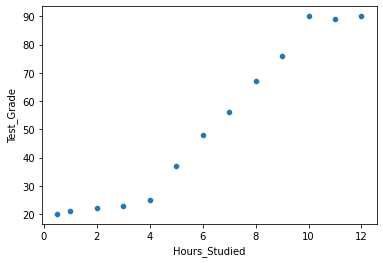

In [15]:
sns.scatterplot(data = df, x = 'Hours_Studied', y = 'Test_Grade')

In [16]:
X = df[['Hours_Studied']].values
y = df['Test_Grade'].values

In [17]:
X

array([[ 0.5],
       [ 1. ],
       [ 2. ],
       [ 3. ],
       [ 4. ],
       [ 5. ],
       [ 6. ],
       [ 7. ],
       [ 8. ],
       [ 9. ],
       [10. ],
       [11. ],
       [12. ]])

In [18]:
y

array([20, 21, 22, 23, 25, 37, 48, 56, 67, 76, 90, 89, 90], dtype=int64)

# Models of different degrees

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
train_data = df.sort_values(by='Hours_Studied')

In [24]:
X = train_data[['Hours_Studied']].values
y = train_data['Test_Grade'].values

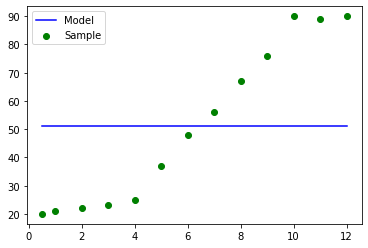

degree = 0, r2_score = 0.0


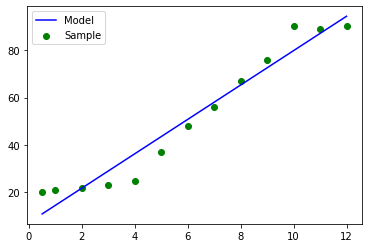

degree = 1, r2_score = 0.9503677766997879


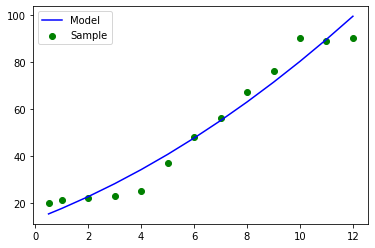

degree = 2, r2_score = 0.9608726568678714


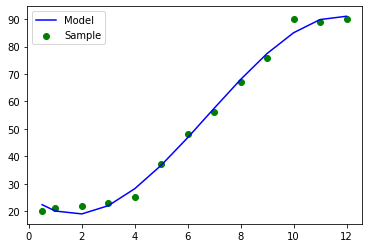

degree = 3, r2_score = 0.9938323120374665


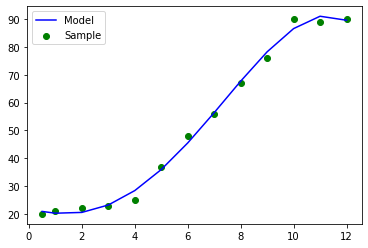

degree = 4, r2_score = 0.9955000184096712
degree = 5, r2_score = 0.9956204913897357
degree = 6, r2_score = 0.996091102063513
degree = 7, r2_score = 0.9967189511077899
degree = 8, r2_score = 0.9990328819442391
degree = 9, r2_score = 0.9991554592785633
degree = 10, r2_score = 0.9991663701562111
degree = 11, r2_score = 0.9999890841330148
degree = 12, r2_score = 0.9999951387386677
degree = 13, r2_score = 0.9999512836083991
degree = 14, r2_score = 0.9996168891894505
degree = 15, r2_score = 0.9433890097720088
degree = 16, r2_score = 0.8786338296803877
degree = 17, r2_score = 0.8646611096214226
degree = 18, r2_score = 0.8205455788459526
degree = 19, r2_score = 0.81088754963289
degree = 20, r2_score = 0.8019798995566849


In [25]:
data = []
for i in range(21):
    poly_feat = PolynomialFeatures(degree = i)
    X_poly = poly_feat.fit_transform(X)

    model = LinearRegression(fit_intercept=False).fit(X_poly,y)

    y_pred = model.predict(X_poly)
    score = r2_score(y,y_pred)
    if i in list(range(5)):
        plt.scatter(X,y,label = 'Sample',color = 'green')
        plt.plot(X, y_pred,label = 'Model',color = 'blue')
        plt.legend(loc = 'best');
        plt.show()
    
    print(f'degree = {i}, r2_score = {score}')
    data.append({'degree': i, 'r2_score': score})

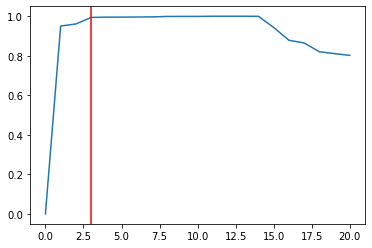

In [26]:
results = pd.DataFrame(data)
plt.plot(results['degree'],results['r2_score'])
plt.axvline(x=3,color = 'red');

In [27]:
df

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25
5,5.0,37
6,6.0,48
7,7.0,56
8,8.0,67
9,9.0,76


# Final Model

In [32]:
X = df[['Hours_Studied']].values
y = df['Test_Grade'].values

In [34]:
poly_feat = PolynomialFeatures(degree = 3)
X = poly_feat.fit_transform(X)

model = LinearRegression(fit_intercept=False).fit(X_poly,y)
y_pred = model.predict(X)

In [35]:
X

array([[1.000e+00, 5.000e-01, 2.500e-01, 1.250e-01],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03]])

In [36]:
y

array([20, 21, 22, 23, 25, 37, 48, 56, 67, 76, 90, 89, 90], dtype=int64)

In [37]:
y_pred

array([22.32939893, 20.01966945, 18.97134198, 21.97579131, 28.18253923,
       36.74110753, 46.80101799, 57.5117924 , 68.02295254, 77.48402019,
       85.04451715, 89.85396519, 91.0618861 ])

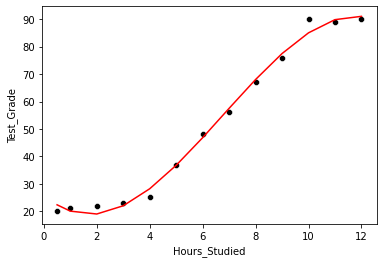

In [38]:
sns.scatterplot(data = df, x = 'Hours_Studied', y = 'Test_Grade', color = 'black')
sns.lineplot(x = df['Hours_Studied'], y = y_pred, color = 'red');

In [39]:
model.intercept_

0.0

In [40]:
model.coef_

array([25.97125195, -8.68670275,  2.87686662, -0.14174637])

In [41]:
r2_score(y, y_pred)

0.9938323120374665

In [ ]:
model.fit(X, y)

In [43]:
def plot_y(true_value,predicted_value, printing = True):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    R2 = r2_score(true_value, predicted_value)
    n,p = len(true_value),X.shape[1]
    R2_Adj = 1-(1-R2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(mean_squared_error(true_value, predicted_value))
    MAE = mean_absolute_error(true_value, predicted_value)
    if printing:
        print(f'Results...')
        print(f'Testing RMSE:   {RMSE}')
        print(f'Testing MAE:    {MAE}')
        print(f'Testing R2:     {R2}')
        print(f'Testing R2 Adj: {R2_Adj}')
    
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max([max(predicted_value), max(true_value)])
    p2 = min([min(predicted_value), min(true_value)])
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show();

Results...
Testing RMSE:   2.15174334308842
Testing MAE:    1.7610083985581189
Testing R2:     0.9938323120374665
Testing R2 Adj: 0.9907484680561998


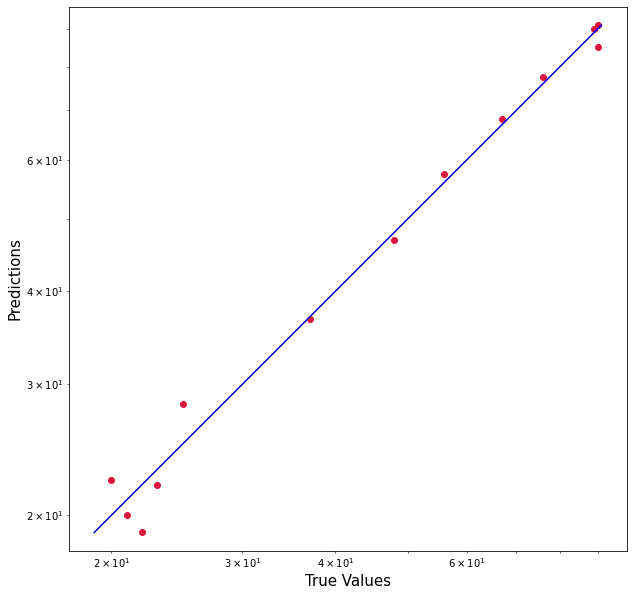

In [44]:
plot_y(y,y_pred)